# Homework 1 Code

In [33]:
# Jeff Che 464957
# Add import statements here
import numpy as np
import matplotlib.pyplot as plt
from math import log

## Perceptron Learning

The `perceptron_learn` function runs the Perceptron Learning Algorithm on input data.

Inputs: 
* `data_in` is a matrix with each row representing an $(x, y)$ pair; the $x$ vector is augmented with a leading 1, the label, $y$, is in the last column. 
Outputs:
The function outputs a tuple, `(w, iterations)`, where: 
* `w` is the learned weight vector; it should linearly separate the data if it is linearly separable.
* `iterations` is the number of iterations the algorithm ran for. 

In [34]:
def perceptron_learn(data_in):
# Your code here, assign the proper values to w and iterations:
        
    # PLA implementation:

    # initialize w as an 11 dimension vector of 0's
    w = np.zeros(11)
    iterations = 0

    while True:
        wrong_count = 0
        
        # loop to check if any are missclassified
        for i in data_in:
          # if missclassified, add x*y to w
            if np.sign(np.dot(w, i[0:11])) != i[11]:
                w = w + i[11]*i[0:11]
                iterations = iterations + 1
                wrong_count = wrong_count + 1
        
        # if no wrong, means there are no wrong left and are finished
        if wrong_count == 0:
            break

    # print("iterations: " + str(iterations))
    
    return w, iterations

# Perceptron Experiment
Code for running the perceptron experiment in HW1. 

Inputs: 
* `N` is the number of training examples
* `d` is the dimensionality of each example (before adding the 1)
* `num_samples` is the number of times to repeat the experiment

Outputs:
* `num_iters` is the number of iterations the Perceptron Learning Algorithm takes for each sample
* `bound_minus_ni` is the difference between the theoretical bound and the actual number of iterations

Both outputs should be `num_samples` long.

In [42]:
def perceptron_experiment(N, d, num_samples):

  # Your code here, assign the values to num_ters and bounds_minus_ni:
    num_iters = []
    bounds_minus_ni = []

    for i in range(num_samples):
        # generate 10 dimension vector w, sampled independently at random form a uniform (0, 1) dist.
        w = np.random.uniform(0, 1, 10)
        # append w to 0, creating the 11 dimension vector w_star.
        w_star = np.append(0, w)

        # setup to initialize training as a 2d list
        x_init = np.append(1, np.random.uniform(-1, 1, d))
        y_init = np.sign(np.dot(w_star, x_init))
        training = np.append(x_init, y_init)

        # create 100 training points (N points),
        # each row is a training point: [ d+1 x-values, y ∈ {-1, 1} ]
        for i in range(N-1):
            # x0 = 1, as defined in lecture #1 and generate d random x values (-1,1):
            x_values = np.append(1, np.random.uniform(-1, 1, d))
            # y is the sign of w_star dot x
            y_value = np.sign(np.dot(w_star, x_values))
            # adding y to the entire row and add row to training data
            row = np.append(x_values, y_value)
            training = np.vstack((training, row))
            # found how to use vstack: https://www.w3resource.com/numpy/manipulation/vstack.php
        
        # print("training data set: " + str(training))

        rho = 999999999999999999999999999.99999999999
        R = 0

        # now find the minimum for rho and maximum for R
        for i in training:
          x = i[0:11]
          y = i[11]
          rho_compare = y*(np.dot(w_star, x))
          R_compare = np.linalg.norm(x)

          if rho_compare < rho:
            rho = rho_compare
          if R_compare > R:
            R = R_compare
        
        # find the magnitude of w_star
        w_mag = np.linalg.norm(w_star)
        # theoretical bound is as defined from 1.3
        t_bound = ((R ** 2)*(w_mag ** 2))/(rho ** 2)
        
        # call perceptron train on training data set and obtain the predicted weight and number of iterations
        num_iters_i = perceptron_learn(training)[1]
        num_iters = np.append(num_iters, num_iters_i)
        # the difference between t and actual
        bounds_minus_ni_i = t_bound - num_iters_i
        # add difference to the differences list
        bounds_minus_ni = np.append(bounds_minus_ni, bounds_minus_ni_i)

    # print(len(num_iters))

    return num_iters, bounds_minus_ni

## Run and Plot

Run the code below

In [43]:
perceptron_experiment(100, 10, 10)

10


(array([ 92., 477.,  56.,  89., 103., 216., 293., 119., 740., 228.]),
 array([2.83923643e+07, 1.06187379e+06, 6.53846650e+03, 1.72567571e+05,
        6.84291374e+05, 1.61387532e+05, 2.34209102e+05, 8.98999430e+04,
        4.05079291e+05, 1.80091094e+05]))

1000


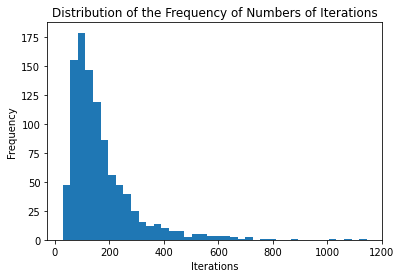

In [44]:
resolution_bins = 40
iterations, differences = perceptron_experiment(100, 10, 1000)

x_axis = iterations

plt.hist(x_axis, resolution_bins)
plt.title("Distribution of the Frequency of Numbers of Iterations")
plt.xlabel("Iterations")
plt.ylabel("Frequency")
plt.show()
# histogram help from: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html

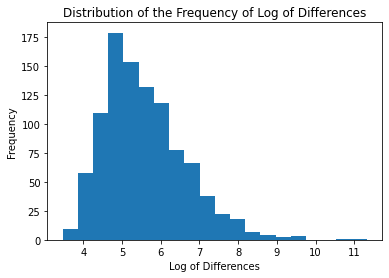

In [47]:
x_log = np.zeros(len(differences))
bins = 20

for i in range(len(differences)):
  x_log[i] = log(differences[i], 10)

plt.hist(x_log, bins)
plt.title("Distribution of the Frequency of Log of Differences")
plt.xlabel("Log of Differences")
plt.ylabel("Frequency")
plt.show()